# Análise Exploratória de Séries Temporais

Este notebook permite analisar diferentes arquivos de séries temporais, gerando relatórios automáticos sobre suas características e visualizações para melhor compreensão dos dados.

## 1. Importar Bibliotecas Necessárias

In [58]:
# Importar todas as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from datetime import datetime
import warnings

# Configurações para melhorar a visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2. Configurar Lista de Arquivos Disponíveis

In [59]:
# Configurar informações dos arquivos disponíveis
arquivos_disponiveis = {
    0: {
        'nome': 'dengue_pernambuco.xlsx',
        'planilha': 'PE',
        'coluna_tempo': 'semana',
        'coluna_valor': 'valor',
        'descricao': 'Dados semanais de casos de dengue em Pernambuco',
        'pasta_saida': 'dengue_pernambuco',
        'tipo_tempo': 'semana'
    },
    1: {
        'nome': 'household_consumption.xlsx',
        'planilha': 'Sheet1',
        'coluna_tempo': 'Date and Hour',
        'coluna_valor': 'Consumption',
        'descricao': 'Consumo doméstico por minuto',
        'pasta_saida': 'household_consumption',
        'tipo_tempo': 'datetime'
    },
    2: {
        'nome': 'solar_france.xlsx',
        'planilha': 'intermittent-renewables-product',
        'coluna_tempo': 'Date and Hour',
        'coluna_valor': 'Production',
        'descricao': 'Produção de energia solar na França por hora',
        'pasta_saida': 'solar_france',
        'tipo_tempo': 'datetime'
    }
}

print("📋 Arquivos configurados:")
for idx, info in arquivos_disponiveis.items():
    print(f"{idx}: {info['nome']} - {info['descricao']}")

📋 Arquivos configurados:
0: dengue_pernambuco.xlsx - Dados semanais de casos de dengue em Pernambuco
1: household_consumption.xlsx - Consumo doméstico por minuto
2: solar_france.xlsx - Produção de energia solar na França por hora


## 3. Interface de Seleção de Arquivo

In [60]:
# Interface para seleção do arquivo
print("=" * 50)
print("🎯 SELETOR DE ARQUIVO PARA ANÁLISE")
print("=" * 50)

print("\nArquivos disponíveis:")
for idx, info in arquivos_disponiveis.items():
    print(f"  [{idx}] {info['nome']}")
    print(f"      📊 {info['descricao']}")
    print(f"      📝 Planilha: {info['planilha']}")
    print()

# Solicitar entrada do usuário
try:
    escolha = int(input("Digite o índice do arquivo que deseja analisar (0, 1 ou 2): "))
    
    if escolha in arquivos_disponiveis:
        arquivo_selecionado = arquivos_disponiveis[escolha]
        print(f"\n✅ Arquivo selecionado: {arquivo_selecionado['nome']}")
        print(f"📋 Descrição: {arquivo_selecionado['descricao']}")
    else:
        raise ValueError("Índice inválido!")
        
except (ValueError, KeyboardInterrupt) as e:
    print(f"\n❌ Erro na seleção: {e}")
    print("Por favor, execute a célula novamente e digite um número válido (0, 1 ou 2).")

🎯 SELETOR DE ARQUIVO PARA ANÁLISE

Arquivos disponíveis:
  [0] dengue_pernambuco.xlsx
      📊 Dados semanais de casos de dengue em Pernambuco
      📝 Planilha: PE

  [1] household_consumption.xlsx
      📊 Consumo doméstico por minuto
      📝 Planilha: Sheet1

  [2] solar_france.xlsx
      📊 Produção de energia solar na França por hora
      📝 Planilha: intermittent-renewables-product


✅ Arquivo selecionado: solar_france.xlsx
📋 Descrição: Produção de energia solar na França por hora

✅ Arquivo selecionado: solar_france.xlsx
📋 Descrição: Produção de energia solar na França por hora


## 4. Carregar e Processar Dados Selecionados

In [61]:
# Carregar dados do arquivo selecionado
try:
    print(f"🔄 Carregando dados de: {arquivo_selecionado['nome']}")

    # Descobrir diretório base do notebook e garantir caminho absoluto
    raiz = Path.cwd()
    data_dir = raiz / 'data'
    caminho_arquivo = data_dir / arquivo_selecionado['nome']

    print(f"📂 Diretório de trabalho atual (CWD): {raiz}")
    print(f"📁 Pasta data esperada: {data_dir} (existe? {data_dir.exists()})")
    print(f"🧭 Caminho do arquivo (absoluto): {caminho_arquivo.resolve() if caminho_arquivo.exists() else caminho_arquivo}")

    if not caminho_arquivo.exists():
        # Tentar caminho alternativo (um nível acima, caso o CWD esteja em subpasta)
        alt_data_dir = raiz.parent / 'data'
        alt_path = alt_data_dir / arquivo_selecionado['nome']
        print(f"🧪 Tentando caminho alternativo: {alt_path}")
        if alt_path.exists():
            caminho_arquivo = alt_path
        else:
            print(f"❌ Arquivo não encontrado nos caminhos testados.")
            # Listar conteúdo da pasta data se existir
            if data_dir.exists():
                print("🔎 Conteúdo de data/:")
                for p in sorted(data_dir.glob('*')):
                    print(" -", p.name)
            else:
                print("⚠️ A pasta 'data' não existe no diretório atual.")
            raise FileNotFoundError(str(caminho_arquivo))

    # Ler Excel (se for CSV, adaptar para pd.read_csv)
    df = pd.read_excel(caminho_arquivo, sheet_name=arquivo_selecionado['planilha'])

    print(f"✅ Dados carregados com sucesso!")
    print(f"📊 Shape dos dados: {df.shape}")
    print(f"📋 Colunas: {list(df.columns)}")

    # Processar coluna de tempo
    coluna_tempo = arquivo_selecionado['coluna_tempo']
    coluna_valor = arquivo_selecionado['coluna_valor']

    # Converter coluna de tempo para datetime
    try:
        if arquivo_selecionado['tipo_tempo'] == 'datetime':
            df[coluna_tempo] = pd.to_datetime(df[coluna_tempo])
        elif arquivo_selecionado['tipo_tempo'] == 'semana':
            df[coluna_tempo] = pd.to_datetime(df[coluna_tempo])
    except (ValueError, TypeError):
        # Se houver erro (geralmente por timezone), usar utc=True e remover timezone
        df[coluna_tempo] = pd.to_datetime(df[coluna_tempo], utc=True).dt.tz_localize(None)

    # Ordenar por tempo
    df = df.sort_values(coluna_tempo).reset_index(drop=True)

    print(f"\n📅 Período dos dados:")
    print(f"   Início: {df[coluna_tempo].min()}")
    print(f"   Fim: {df[coluna_tempo].max()}")
    print(f"   Total de registros: {len(df)}")

    # Mostrar primeiras linhas
    print(f"\n🔍 Primeiras 5 linhas dos dados:")
    display(df.head())

except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")
    print("Verifique se o arquivo existe na pasta 'data' e se o nome está correto.")

🔄 Carregando dados de: solar_france.xlsx
📂 Diretório de trabalho atual (CWD): c:\Users\joncu\OneDrive\Documentos\series_temporais_projeto
📁 Pasta data esperada: c:\Users\joncu\OneDrive\Documentos\series_temporais_projeto\data (existe? True)
🧭 Caminho do arquivo (absoluto): C:\Users\joncu\OneDrive\Documentos\series_temporais_projeto\data\solar_france.xlsx
✅ Dados carregados com sucesso!
📊 Shape dos dados: (29902, 2)
📋 Colunas: ['Date and Hour', 'Production']
✅ Dados carregados com sucesso!
📊 Shape dos dados: (29902, 2)
📋 Colunas: ['Date and Hour', 'Production']

📅 Período dos dados:
   Início: 2020-01-01 00:00:00+01:00
   Fim: 2023-06-30 23:00:00+02:00
   Total de registros: 29902

🔍 Primeiras 5 linhas dos dados:

📅 Período dos dados:
   Início: 2020-01-01 00:00:00+01:00
   Fim: 2023-06-30 23:00:00+02:00
   Total de registros: 29902

🔍 Primeiras 5 linhas dos dados:


,Date and Hour,Production
0,2020-01-01 00:00:00+01:00,0.0
1,2020-01-01 01:00:00+01:00,0.0
2,2020-01-01 02:00:00+01:00,0.0
3,2020-01-01 03:00:00+01:00,0.0
4,2020-01-01 04:00:00+01:00,0.0


## 5. Criar Estrutura de Pastas de Saída

In [62]:
# Criar estrutura de pastas para saída
pasta_base = 'out'
pasta_arquivo = arquivo_selecionado['pasta_saida']
caminho_saida = os.path.join(pasta_base, pasta_arquivo)

# Criar pastas se não existirem
os.makedirs(caminho_saida, exist_ok=True)

print(f"📁 Pasta de saída criada: {caminho_saida}")

# Definir caminhos para os arquivos de saída
relatorio_path = os.path.join(caminho_saida, 'relatorio_analise.md')
graficos_pasta = os.path.join(caminho_saida, 'graficos')
os.makedirs(graficos_pasta, exist_ok=True)

print(f"📊 Pasta para gráficos: {graficos_pasta}")
print(f"📝 Arquivo de relatório: {relatorio_path}")

📁 Pasta de saída criada: out\solar_france
📊 Pasta para gráficos: out\solar_france\graficos
📝 Arquivo de relatório: out\solar_france\relatorio_analise.md


## 6. Análise das Características da Série Temporal

In [63]:
# Análise das características da série temporal
print("🔍 ANÁLISE DAS CARACTERÍSTICAS DA SÉRIE TEMPORAL")
print("=" * 60)

# 1. Univariada vs Multivariada
num_variaveis_numericas = len([col for col in df.columns if df[col].dtype in ['int64', 'float64']])
if num_variaveis_numericas == 1:
    tipo_variavel = "Univariada"
    explicacao_variavel = f"Série univariada porque utiliza apenas uma variável numérica ({coluna_valor}) para análise temporal."
else:
    tipo_variavel = "Multivariada"
    explicacao_variavel = f"Série multivariada porque utiliza {num_variaveis_numericas} variáveis numéricas para análise."

print(f"📊 Tipo de Variável: {tipo_variavel}")
print(f"   {explicacao_variavel}")

# 2. Contínua vs Discreta
df_temp = df.copy()
df_temp['diff'] = df_temp[coluna_tempo].diff()

# Calcular intervalos de tempo
intervalos = df_temp['diff'].dropna()
intervalos_unicos = intervalos.unique()
intervalos_regulares = len(intervalos_unicos) <= 3  # Considera regular se tiver até 3 intervalos diferentes

if intervalos_regulares:
    tipo_continuidade = "Contínua"
    intervalo_mais_comum = intervalos.mode()[0] if not intervalos.empty else "N/A"
    explicacao_continuidade = f"Série contínua pois o tempo é regular com intervalo mais comum de {intervalo_mais_comum}."
else:
    tipo_continuidade = "Discreta"
    explicacao_continuidade = "Série discreta pois os intervalos de tempo são irregulares."

print(f"\n⏰ Tipo de Continuidade: {tipo_continuidade}")
print(f"   {explicacao_continuidade}")

# 3. Análise de Sazonalidade
print(f"\n🔄 Análise de Sazonalidade:")

# Garantir que a coluna de tempo está em formato datetime apropriado (sem timezone)
if not pd.api.types.is_datetime64_any_dtype(df_temp[coluna_tempo]):
    try:
        df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo])
    except (ValueError, TypeError):
        df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo], utc=True).dt.tz_localize(None)
elif hasattr(df_temp[coluna_tempo].dt, 'tz') and df_temp[coluna_tempo].dt.tz is not None:
    # Se já é datetime mas tem timezone, remover
    df_temp[coluna_tempo] = df_temp[coluna_tempo].dt.tz_localize(None)

# Verificar padrões baseados no tipo de dados
if arquivo_selecionado['tipo_tempo'] == 'datetime':
    df_temp['hora'] = df_temp[coluna_tempo].dt.hour
    df_temp['dia_semana'] = df_temp[coluna_tempo].dt.dayofweek
    df_temp['mes'] = df_temp[coluna_tempo].dt.month
    
    # Análise por hora (se houver dados horários)
    if len(df_temp['hora'].unique()) > 1:
        variancia_hora = df_temp.groupby('hora')[coluna_valor].var().mean()
        print(f"   📈 Variância por hora: {variancia_hora:.2f}")
        
    # Análise por dia da semana
    if len(df_temp['dia_semana'].unique()) > 1:
        variancia_dia = df_temp.groupby('dia_semana')[coluna_valor].var().mean()
        print(f"   📅 Variância por dia da semana: {variancia_dia:.2f}")
        
    # Análise por mês
    if len(df_temp['mes'].unique()) > 1:
        variancia_mes = df_temp.groupby('mes')[coluna_valor].var().mean()
        print(f"   🗓️ Variância por mês: {variancia_mes:.2f}")

elif arquivo_selecionado['tipo_tempo'] == 'semana':
    # Para dados semanais, analisar padrões anuais
    # Garantir formato datetime apropriado (sem timezone)
    if not pd.api.types.is_datetime64_any_dtype(df_temp[coluna_tempo]):
        try:
            df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo])
        except (ValueError, TypeError):
            df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo], utc=True).dt.tz_localize(None)
    elif hasattr(df_temp[coluna_tempo].dt, 'tz') and df_temp[coluna_tempo].dt.tz is not None:
        df_temp[coluna_tempo] = df_temp[coluna_tempo].dt.tz_localize(None)
    
    df_temp['ano'] = df_temp[coluna_tempo].dt.year
    df_temp['semana_ano'] = df_temp[coluna_tempo].dt.isocalendar().week
    
    if len(df_temp['semana_ano'].unique()) > 10:
        variancia_semanal = df_temp.groupby('semana_ano')[coluna_valor].var().mean()
        print(f"   📊 Variância por semana do ano: {variancia_semanal:.2f}")

# Determinar se é sazonal baseado na variância dos valores
coef_variacao = df[coluna_valor].std() / df[coluna_valor].mean() if df[coluna_valor].mean() != 0 else 0

if coef_variacao > 0.3:  # Limite arbitrário para considerar sazonal
    sazonalidade = "Sazonal"
    explicacao_sazonalidade = f"Série apresenta sazonalidade com coeficiente de variação de {coef_variacao:.2f}, indicando padrões que se repetem ao longo do tempo."
else:
    sazonalidade = "Não-sazonal"
    explicacao_sazonalidade = f"Série não apresenta sazonalidade significativa (coef. variação: {coef_variacao:.2f})."

print(f"\n🌊 Sazonalidade: {sazonalidade}")
print(f"   {explicacao_sazonalidade}")

# Resumo das características
caracteristicas = {
    'tipo_variavel': tipo_variavel,
    'explicacao_variavel': explicacao_variavel,
    'tipo_continuidade': tipo_continuidade,
    'explicacao_continuidade': explicacao_continuidade,
    'sazonalidade': sazonalidade,
    'explicacao_sazonalidade': explicacao_sazonalidade,
    'coef_variacao': coef_variacao
}

print(f"\n✅ Análise concluída!")
print(f"📋 Resumo: {tipo_variavel} | {tipo_continuidade} | {sazonalidade}")

🔍 ANÁLISE DAS CARACTERÍSTICAS DA SÉRIE TEMPORAL
📊 Tipo de Variável: Univariada
   Série univariada porque utiliza apenas uma variável numérica (Production) para análise temporal.

⏰ Tipo de Continuidade: Discreta
   Série discreta pois os intervalos de tempo são irregulares.

🔄 Análise de Sazonalidade:
   📈 Variância por hora: 731267.98
   📅 Variância por dia da semana: 2394235.08
   🗓️ Variância por mês: 2178683.44

🌊 Sazonalidade: Sazonal
   Série apresenta sazonalidade com coeficiente de variação de 1.45, indicando padrões que se repetem ao longo do tempo.

✅ Análise concluída!
📋 Resumo: Univariada | Discreta | Sazonal


## 7. Gerar Visualizações dos Dados

📊 GERANDO VISUALIZAÇÕES DOS DADOS


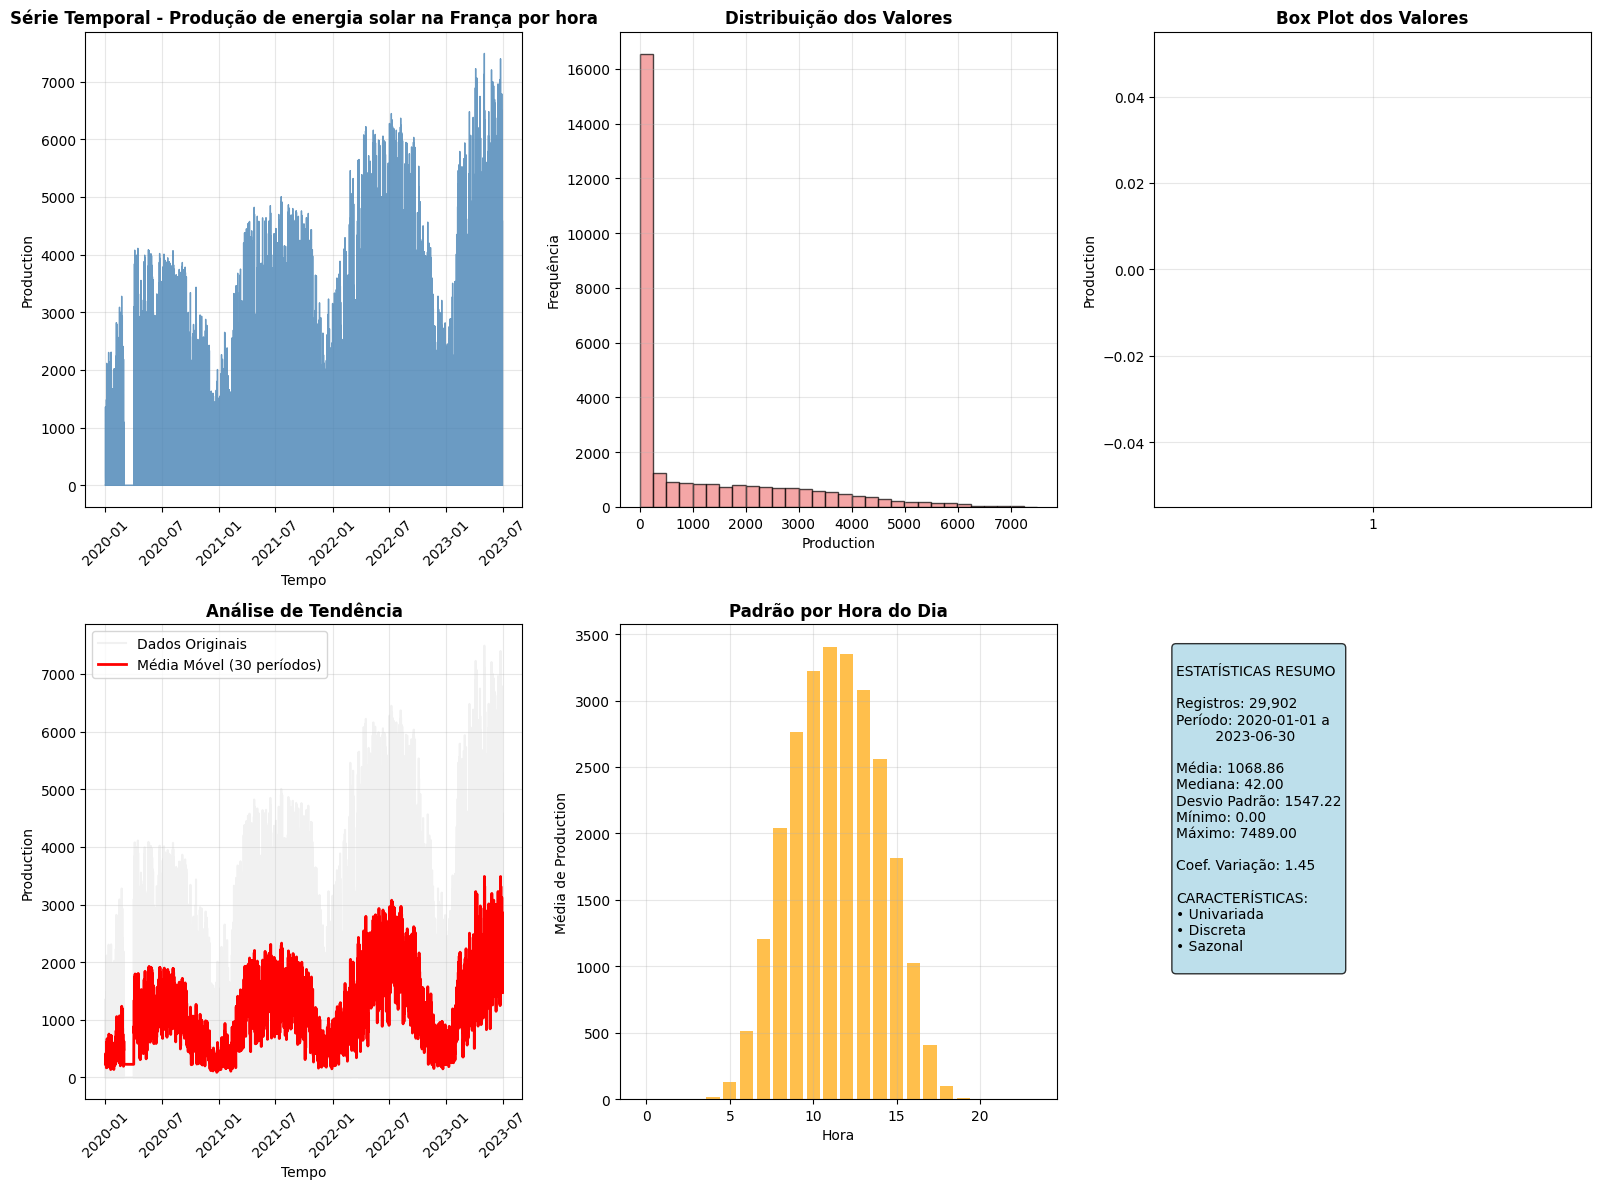

✅ Visualizações geradas e salvas em: out\solar_france\graficos\analise_completa.png


In [ ]:
# Gerar visualizações dos dados
print("📊 GERANDO VISUALIZAÇÕES DOS DADOS")
print("=" * 40)

# Configurar subplot
fig = plt.figure(figsize=(16, 12))

# 1. Gráfico de Linha Temporal Principal
plt.subplot(2, 3, 1)
plt.plot(df[coluna_tempo], df[coluna_valor], linewidth=1, alpha=0.8, color='steelblue')
plt.title(f'Série Temporal - {arquivo_selecionado["descricao"]}', fontsize=12, fontweight='bold')
plt.xlabel('Tempo', fontsize=10)
plt.ylabel(coluna_valor, fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Histograma de Distribuição
plt.subplot(2, 3, 2)
plt.hist(df[coluna_valor], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribuição dos Valores', fontsize=12, fontweight='bold')
plt.xlabel(coluna_valor, fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Box Plot
plt.subplot(2, 3, 3)
# Remover valores NaN para o boxplot
dados_boxplot = df[coluna_valor].dropna()
if len(dados_boxplot) > 0:
    plt.boxplot(dados_boxplot, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title('Box Plot dos Valores', fontsize=12, fontweight='bold')
    plt.ylabel(coluna_valor, fontsize=10)
    plt.xticks([1], [''])  # Remove rótulo do eixo x
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Sem dados\npara exibir', 
            ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Box Plot dos Valores', fontsize=12, fontweight='bold')

# 4. Análise de Tendência (Média Móvel)
plt.subplot(2, 3, 4)
if len(df) > 30:
    window = min(30, len(df)//4)
    media_movel = df[coluna_valor].rolling(window=window).mean()
    plt.plot(df[coluna_tempo], df[coluna_valor], alpha=0.3, color='lightgray', label='Dados Originais')
    plt.plot(df[coluna_tempo], media_movel, color='red', linewidth=2, label=f'Média Móvel ({window} períodos)')
    plt.legend()
else:
    plt.plot(df[coluna_tempo], df[coluna_valor], color='steelblue')
plt.title('Análise de Tendência', fontsize=12, fontweight='bold')
plt.xlabel('Tempo', fontsize=10)
plt.ylabel(coluna_valor, fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 5. Análise Sazonal (se aplicável)
plt.subplot(2, 3, 5)
if arquivo_selecionado['tipo_tempo'] == 'datetime' and len(df) > 24:
    # Análise por hora do dia
    df_temp = df.copy()
    # Garantir formato datetime apropriado (sem timezone)
    if not pd.api.types.is_datetime64_any_dtype(df_temp[coluna_tempo]):
        try:
            df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo])
        except (ValueError, TypeError):
            df_temp[coluna_tempo] = pd.to_datetime(df_temp[coluna_tempo], utc=True).dt.tz_localize(None)
    elif hasattr(df_temp[coluna_tempo].dt, 'tz') and df_temp[coluna_tempo].dt.tz is not None:
        df_temp[coluna_tempo] = df_temp[coluna_tempo].dt.tz_localize(None)
    
    df_temp['hora'] = df_temp[coluna_tempo].dt.hour
    valores_por_hora = df_temp.groupby('hora')[coluna_valor].mean()
    
    if len(valores_por_hora) > 1:
        plt.bar(valores_por_hora.index, valores_por_hora.values, alpha=0.7, color='orange')
        plt.title('Padrão por Hora do Dia', fontsize=12, fontweight='bold')
        plt.xlabel('Hora', fontsize=10)
        plt.ylabel(f'Média de {coluna_valor}', fontsize=10)
    else:
        plt.text(0.5, 0.5, 'Dados insuficientes\npara análise sazonal', 
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Análise Sazonal', fontsize=12, fontweight='bold')
else:
    # Para dados semanais ou poucos dados
    plt.text(0.5, 0.5, 'Análise sazonal\nnão aplicável\npara este dataset', 
            ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Análise Sazonal', fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3)

# 6. Estatísticas Resumo Visual
plt.subplot(2, 3, 6)
plt.axis('off')
stats_text = f'''
ESTATÍSTICAS RESUMO

Registros: {len(df):,}
Período: {df[coluna_tempo].min().strftime("%Y-%m-%d")} a 
         {df[coluna_tempo].max().strftime("%Y-%m-%d")}

Média: {df[coluna_valor].mean():.2f}
Mediana: {df[coluna_valor].median():.2f}
Desvio Padrão: {df[coluna_valor].std():.2f}
Mínimo: {df[coluna_valor].min():.2f}
Máximo: {df[coluna_valor].max():.2f}

Coef. Variação: {caracteristicas["coef_variacao"]:.2f}

CARACTERÍSTICAS:
• {caracteristicas["tipo_variavel"]}
• {caracteristicas["tipo_continuidade"]}
• {caracteristicas["sazonalidade"]}
'''

plt.text(0.05, 0.95, stats_text, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.tight_layout()

# Salvar gráfico
grafico_path = os.path.join(graficos_pasta, 'analise_completa.png')
plt.savefig(grafico_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Visualizações geradas e salvas em: {grafico_path}")

## 8. Estatísticas Descritivas Detalhadas

In [65]:
# Estatísticas descritivas detalhadas
print("📈 ESTATÍSTICAS DESCRITIVAS DETALHADAS")
print("=" * 50)

# Estatísticas básicas
print("📊 Estatísticas Básicas:")
print(f"   Quantidade de observações: {len(df):,}")
print(f"   Média: {df[coluna_valor].mean():.4f}")
print(f"   Mediana: {df[coluna_valor].median():.4f}")
print(f"   Moda: {df[coluna_valor].mode()[0]:.4f}" if not df[coluna_valor].mode().empty else "   Moda: N/A")
print(f"   Desvio Padrão: {df[coluna_valor].std():.4f}")
print(f"   Variância: {df[coluna_valor].var():.4f}")

# Estatísticas de posição
print(f"\n📍 Estatísticas de Posição:")
print(f"   Mínimo: {df[coluna_valor].min():.4f}")
print(f"   1º Quartil (Q1): {df[coluna_valor].quantile(0.25):.4f}")
print(f"   2º Quartil (Q2/Mediana): {df[coluna_valor].quantile(0.50):.4f}")
print(f"   3º Quartil (Q3): {df[coluna_valor].quantile(0.75):.4f}")
print(f"   Máximo: {df[coluna_valor].max():.4f}")
print(f"   Amplitude: {df[coluna_valor].max() - df[coluna_valor].min():.4f}")
print(f"   Amplitude Interquartil (IQR): {df[coluna_valor].quantile(0.75) - df[coluna_valor].quantile(0.25):.4f}")

# Estatísticas de forma
print(f"\n📐 Estatísticas de Forma:")
skewness = df[coluna_valor].skew()
kurtosis = df[coluna_valor].kurtosis()
print(f"   Assimetria (Skewness): {skewness:.4f}")
if skewness > 0.5:
    print("     → Distribuição assimétrica à direita (cauda longa à direita)")
elif skewness < -0.5:
    print("     → Distribuição assimétrica à esquerda (cauda longa à esquerda)")
else:
    print("     → Distribuição aproximadamente simétrica")

print(f"   Curtose (Kurtosis): {kurtosis:.4f}")
if kurtosis > 0:
    print("     → Distribuição leptocúrtica (mais pontiaguda que a normal)")
elif kurtosis < 0:
    print("     → Distribuição platicúrtica (mais achatada que a normal)")
else:
    print("     → Distribuição mesocúrtica (similar à normal)")

# Estatísticas temporais
print(f"\n⏰ Estatísticas Temporais:")
print(f"   Data/Hora inicial: {df[coluna_tempo].min()}")
print(f"   Data/Hora final: {df[coluna_tempo].max()}")
duracao_total = df[coluna_tempo].max() - df[coluna_tempo].min()
print(f"   Duração total: {duracao_total}")

# Análise de valores ausentes
print(f"\n❓ Análise de Dados Ausentes:")
valores_nulos = df[coluna_valor].isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100
print(f"   Valores ausentes: {valores_nulos} ({percentual_nulos:.2f}%)")

# Análise de outliers (método IQR)
Q1 = df[coluna_valor].quantile(0.25)
Q3 = df[coluna_valor].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df[(df[coluna_valor] < limite_inferior) | (df[coluna_valor] > limite_superior)]

print(f"\n🚨 Análise de Outliers (Método IQR):")
print(f"   Limite inferior: {limite_inferior:.4f}")
print(f"   Limite superior: {limite_superior:.4f}")
print(f"   Quantidade de outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")

if len(outliers) > 0:
    print(f"   Outliers encontrados:")
    for idx, row in outliers.head(5).iterrows():
        print(f"     - {row[coluna_tempo]}: {row[coluna_valor]:.4f}")
    if len(outliers) > 5:
        print(f"     ... e mais {len(outliers) - 5} outliers")

# Tabela de estatísticas resumo
print(f"\n📋 Tabela Resumo de Estatísticas:")
stats_resumo = df[coluna_valor].describe()
display(stats_resumo)

# Criar dicionário com todas as estatísticas para uso posterior
estatisticas_completas = {
    'basicas': {
        'count': len(df),
        'mean': df[coluna_valor].mean(),
        'median': df[coluna_valor].median(),
        'std': df[coluna_valor].std(),
        'var': df[coluna_valor].var(),
        'min': df[coluna_valor].min(),
        'max': df[coluna_valor].max(),
        'range': df[coluna_valor].max() - df[coluna_valor].min()
    },
    'quartis': {
        'q1': df[coluna_valor].quantile(0.25),
        'q2': df[coluna_valor].quantile(0.50),
        'q3': df[coluna_valor].quantile(0.75),
        'iqr': df[coluna_valor].quantile(0.75) - df[coluna_valor].quantile(0.25)
    },
    'forma': {
        'skewness': skewness,
        'kurtosis': kurtosis
    },
    'temporal': {
        'inicio': df[coluna_tempo].min(),
        'fim': df[coluna_tempo].max(),
        'duracao': duracao_total
    },
    'qualidade': {
        'valores_nulos': valores_nulos,
        'percentual_nulos': percentual_nulos,
        'outliers_count': len(outliers),
        'outliers_percent': len(outliers)/len(df)*100
    }
}

print("✅ Estatísticas descritivas calculadas!")

📈 ESTATÍSTICAS DESCRITIVAS DETALHADAS
📊 Estatísticas Básicas:
   Quantidade de observações: 29,902
   Média: 1068.8624
   Mediana: 42.0000
   Moda: 1.0000
   Desvio Padrão: 1547.2207
   Variância: 2393891.9766

📍 Estatísticas de Posição:
   Mínimo: 0.0000
   1º Quartil (Q1): 1.0000
   2º Quartil (Q2/Mediana): 42.0000
   3º Quartil (Q3): 1909.0000
   Máximo: 7489.0000
   Amplitude: 7489.0000
   Amplitude Interquartil (IQR): 1908.0000

📐 Estatísticas de Forma:
   Assimetria (Skewness): 1.4176
     → Distribuição assimétrica à direita (cauda longa à direita)
   Curtose (Kurtosis): 1.0786
     → Distribuição leptocúrtica (mais pontiaguda que a normal)

⏰ Estatísticas Temporais:
   Data/Hora inicial: 2020-01-01 00:00:00+01:00
   Data/Hora final: 2023-06-30 23:00:00+02:00
   Duração total: 1276 days 22:00:00

❓ Análise de Dados Ausentes:
   Valores ausentes: 1 (0.00%)

🚨 Análise de Outliers (Método IQR):
   Limite inferior: -2861.0000
   Limite superior: 4771.0000
   Quantidade de outliers: 

count    29901.000000
mean      1068.862379
std       1547.220727
min          0.000000
25%          1.000000
50%         42.000000
75%       1909.000000
max       7489.000000
Name: Production, dtype: float64

✅ Estatísticas descritivas calculadas!


## 9. Salvar Relatório de Análise

In [66]:
# Gerar e salvar relatório completo
print("📝 GERANDO RELATÓRIO DE ANÁLISE")
print("=" * 40)

# Criar conteúdo do relatório em markdown
relatorio_content = f"""# Relatório de Análise de Série Temporal

**Arquivo:** {arquivo_selecionado['nome']}  
**Planilha:** {arquivo_selecionado['planilha']}  
**Descrição:** {arquivo_selecionado['descricao']}  
**Data da Análise:** {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}

---

## 🔍 Características da Série Temporal

### Tipo de Variável: {caracteristicas['tipo_variavel']}
{caracteristicas['explicacao_variavel']}

### Tipo de Continuidade: {caracteristicas['tipo_continuidade']}
{caracteristicas['explicacao_continuidade']}

### Sazonalidade: {caracteristicas['sazonalidade']}
{caracteristicas['explicacao_sazonalidade']}

---

## 📊 Informações Gerais dos Dados

- **Total de registros:** {estatisticas_completas['basicas']['count']:,}
- **Coluna temporal:** {coluna_tempo}
- **Coluna de valores:** {coluna_valor}
- **Período de dados:** {estatisticas_completas['temporal']['inicio']} até {estatisticas_completas['temporal']['fim']}
- **Duração total:** {estatisticas_completas['temporal']['duracao']}

---

## 📈 Estatísticas Descritivas

### Medidas de Tendência Central
- **Média:** {estatisticas_completas['basicas']['mean']:.4f}
- **Mediana:** {estatisticas_completas['basicas']['median']:.4f}

### Medidas de Dispersão
- **Desvio Padrão:** {estatisticas_completas['basicas']['std']:.4f}
- **Variância:** {estatisticas_completas['basicas']['var']:.4f}
- **Coeficiente de Variação:** {caracteristicas['coef_variacao']:.4f}

### Medidas de Posição
- **Valor Mínimo:** {estatisticas_completas['basicas']['min']:.4f}
- **1º Quartil (Q1):** {estatisticas_completas['quartis']['q1']:.4f}
- **2º Quartil (Q2/Mediana):** {estatisticas_completas['quartis']['q2']:.4f}
- **3º Quartil (Q3):** {estatisticas_completas['quartis']['q3']:.4f}
- **Valor Máximo:** {estatisticas_completas['basicas']['max']:.4f}
- **Amplitude:** {estatisticas_completas['basicas']['range']:.4f}
- **Amplitude Interquartil (IQR):** {estatisticas_completas['quartis']['iqr']:.4f}

### Medidas de Forma
- **Assimetria (Skewness):** {estatisticas_completas['forma']['skewness']:.4f}
"""

# Interpretação da assimetria
if estatisticas_completas['forma']['skewness'] > 0.5:
    relatorio_content += "  - *Distribuição assimétrica à direita (cauda longa à direita)*\n"
elif estatisticas_completas['forma']['skewness'] < -0.5:
    relatorio_content += "  - *Distribuição assimétrica à esquerda (cauda longa à esquerda)*\n"
else:
    relatorio_content += "  - *Distribuição aproximadamente simétrica*\n"

relatorio_content += f"""
- **Curtose (Kurtosis):** {estatisticas_completas['forma']['kurtosis']:.4f}
"""

# Interpretação da curtose
if estatisticas_completas['forma']['kurtosis'] > 0:
    relatorio_content += "  - *Distribuição leptocúrtica (mais pontiaguda que a normal)*\n"
elif estatisticas_completas['forma']['kurtosis'] < 0:
    relatorio_content += "  - *Distribuição platicúrtica (mais achatada que a normal)*\n"
else:
    relatorio_content += "  - *Distribuição mesocúrtica (similar à normal)*\n"

relatorio_content += f"""
---

## 📋 Qualidade dos Dados

- **Valores ausentes:** {estatisticas_completas['qualidade']['valores_nulos']} ({estatisticas_completas['qualidade']['percentual_nulos']:.2f}%)
- **Outliers detectados:** {estatisticas_completas['qualidade']['outliers_count']} ({estatisticas_completas['qualidade']['outliers_percent']:.2f}%)

---

## 📊 Visualizações Geradas

As seguintes visualizações foram criadas e salvas na pasta `graficos/`:

1. **Série Temporal Principal** - Gráfico de linha mostrando a evolução temporal dos dados
2. **Histograma de Distribuição** - Distribuição de frequências dos valores
3. **Box Plot** - Visualização dos quartis e outliers
4. **Análise de Tendência** - Série original com média móvel
5. **Análise Sazonal** - Padrões por período (quando aplicável)

---

## 🎯 Resumo Executivo

Esta série temporal é caracterizada como **{caracteristicas['tipo_variavel']}**, **{caracteristicas['tipo_continuidade']}** e **{caracteristicas['sazonalidade']}**.

### Principais Insights:

1. **Variabilidade:** O coeficiente de variação de {caracteristicas['coef_variacao']:.2f} indica {"alta" if caracteristicas['coef_variacao'] > 0.5 else "média" if caracteristicas['coef_variacao'] > 0.2 else "baixa"} variabilidade nos dados.

2. **Distribuição:** {"A série apresenta assimetria significativa" if abs(estatisticas_completas['forma']['skewness']) > 0.5 else "A série possui distribuição aproximadamente simétrica"}.

3. **Qualidade:** {"Excelente qualidade dos dados" if estatisticas_completas['qualidade']['percentual_nulos'] < 1 else "Boa qualidade dos dados" if estatisticas_completas['qualidade']['percentual_nulos'] < 5 else "Qualidade moderada dos dados"} com {estatisticas_completas['qualidade']['percentual_nulos']:.1f}% de valores ausentes.

4. **Outliers:** {"Poucos outliers detectados" if estatisticas_completas['qualidade']['outliers_percent'] < 5 else "Presença significativa de outliers"} ({estatisticas_completas['qualidade']['outliers_percent']:.1f}% dos dados).

---

## 📁 Arquivos Gerados

- `relatorio_analise.md` - Este relatório completo
- `graficos/analise_completa.png` - Painel com todas as visualizações

---

*Relatório gerado automaticamente pelo sistema de análise de séries temporais.*
"""

# Salvar relatório
try:
    with open(relatorio_path, 'w', encoding='utf-8') as f:
        f.write(relatorio_content)
    
    print(f"✅ Relatório salvo com sucesso em: {relatorio_path}")
    
    # Mostrar estrutura final de arquivos criados
    print(f"\n📁 Arquivos criados na pasta '{caminho_saida}':")
    for root, dirs, files in os.walk(caminho_saida):
        level = root.replace(caminho_saida, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            print(f"{subindent}{file}")
    
    print(f"\n🎉 Análise completa finalizada!")
    print(f"📋 Resumo: {arquivo_selecionado['nome']} → {caracteristicas['tipo_variavel']} | {caracteristicas['tipo_continuidade']} | {caracteristicas['sazonalidade']}")
    
except Exception as e:
    print(f"❌ Erro ao salvar relatório: {e}")

print("\n" + "="*60)
print("✅ PROCESSO CONCLUÍDO COM SUCESSO!")
print("="*60)

📝 GERANDO RELATÓRIO DE ANÁLISE
✅ Relatório salvo com sucesso em: out\solar_france\relatorio_analise.md

📁 Arquivos criados na pasta 'out\solar_france':
solar_france/
  relatorio_analise.md
  graficos/
    analise_completa.png

🎉 Análise completa finalizada!
📋 Resumo: solar_france.xlsx → Univariada | Discreta | Sazonal

✅ PROCESSO CONCLUÍDO COM SUCESSO!
